# Diabete and Scikit Learn

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Logistic regression

In [58]:
data = pd.read_csv('diabete.csv')

In [59]:
data.head()

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
data.diabete.value_counts()

0    500
1    268
Name: diabete, dtype: int64

In [93]:
data_train = data.sample(frac=0.8)
data_test = data.drop(data_train.index)

In [94]:
# Let's save this
data_train.to_csv('train.csv', index=False)
data_test.to_csv('test.csv', index=False)

In [95]:
# Now we use the saved data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [96]:
# Separate X and Y
X_train = data_train.drop(['diabete'], axis=1)
Y_train = data_train.diabete
X_test = data_test.drop(['diabete'], axis=1)
Y_test = data_test.diabete

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
Y_lr = lr.predict(X_test)

In [100]:
# Our accuracy
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_lr)

0.7792207792207793

In [101]:
cm_lr = metrics.confusion_matrix(Y_test, Y_lr)
print(cm_lr)

[[86 11]
 [23 34]]


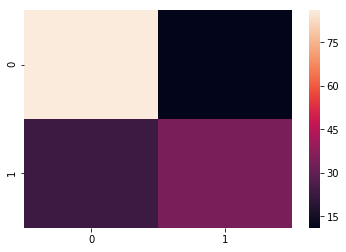

In [102]:
sns.heatmap(cm_lr)

## Decision Trees

In [103]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_dtc = dtc.predict(X_test)
metrics.accuracy_score(Y_test, Y_dtc)

0.6493506493506493

In [104]:
cm_dtc = metrics.confusion_matrix(Y_test, Y_dtc)
print(cm_dtc)

[[71 26]
 [28 29]]


In [105]:
# Let's change our parameters
from sklearn import model_selection
param = {'max_depth':[2, 3, 5, 7], 'min_samples_leaf':[1, 2, 3, 5, 20]}
dtc_gs = model_selection.GridSearchCV(dtc, param)

In [106]:
dtc_gs.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 5, 7], 'min_samples_leaf': [1, 2, 3, 5, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [107]:
print(dtc_gs.best_params_)

{'max_depth': 5, 'min_samples_leaf': 3}


In [108]:
Y_dtc2 = dtc_gs.best_estimator_.predict(X_test)
metrics.accuracy_score(Y_test, Y_dtc2)

0.7272727272727273

## Random Forest

In [109]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_rf = rf.predict(X_test)
metrics.accuracy_score(Y_test, Y_rf)

0.7467532467532467

In [110]:
param = {'n_estimators':[10, 30, 100, 150], 'min_samples_leaf':[1, 2, 3, 5, 20]}
rf_gs = model_selection.GridSearchCV(rf, param)
rf_gs.fit(X_train, Y_train)
print(rf_gs.best_params_)
Y_rf2 = rf_gs.best_estimator_.predict(X_test)
metrics.accuracy_score(Y_test, Y_rf2)

{'n_estimators': 150, 'min_samples_leaf': 1}


0.7727272727272727